In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
bmi_life_data = pd.read_csv("bmi.csv")

In [6]:
bmi_life_data.columns

Index(['Country', 'Life expectancy', 'BMI'], dtype='object')

In [13]:
lr = LinearRegression()
lr.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])
lr.predict(21.07931)

array([[ 60.31564716]])

In [18]:
type(bmi_life_data['BMI'])

pandas.core.series.Series

In [17]:
type(bmi_life_data[['BMI']])

pandas.core.frame.DataFrame

In [25]:
a = np.arange(10)
print("Shape =", a.shape, ", Dimensions =", a.ndim)

Shape = (10,) , Dimensions = 1


In [37]:
b = a[:, None]
print("Shape =", b.shape, ", Dimensions =", b.ndim)

Shape = (10, 1) , Dimensions = 2


In [28]:
c = a[:, np.newaxis]
print("Shape =", c.shape, ", Dimensions =", c.ndim)

Shape = (10, 1) , Dimensions = 2


In [30]:
d = a.reshape(-1, 1)
print("Shape =", d.shape, ", Dimensions =", d.ndim)

Shape = (10, 1) , Dimensions = 2


In [35]:
e = np.arange(24).reshape(2, 3, 4)
print("e.shape:", e.shape)
print("e[:, :, :, None].shape:", e[:, :, :, None].shape)

e.shape: (2, 3, 4)
e[:, :, :, None].shape: (2, 3, 4, 1)


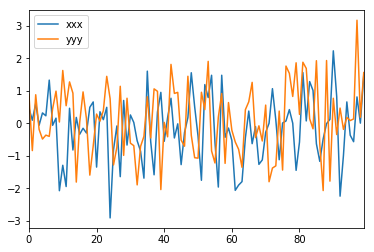

In [11]:
%matplotlib inline
x = np.random.randn(100)
y = np.random.randn(100)
pd.DataFrame({'xxx':x, 'yyy':y}).plot()

In [12]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1 - output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[ 0.00804047  0.00555918]
Change in weights for input layer to hidden layer:
[[  1.77005547e-04  -5.11178506e-04]
 [  3.54011093e-05  -1.02235701e-04]
 [ -7.08022187e-05   2.04471402e-04]]


In [13]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(21)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

c:\anaconda\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [18]:
features.shape

(360, 6)

In [19]:
targets.shape

(360,)

In [54]:
features = features[:5]
targets = targets[:5]

In [55]:
n_records, n_features = features.shape
print("训练数据个数：", n_records)
print("输入特征数量：", n_features)

训练数据个数： 5
输入特征数量： 6


In [50]:
iterable = zip(features.values, targets)
next(iterable)

(array([ 0.97215519,  0.44696493,  1.        ,  0.        ,  0.        ,  0.        ]),
 1)

In [58]:
# 每个训练数据包含6个输入特征：GRE, GPA, RANK1234
# 360个训练数据（360，6）

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 100
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5, size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5, size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output, weights_hidden_output))
        
        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set

    hidden_output = sigmoid(np.dot(x, weights_input_hidden))
    out = sigmoid(np.dot(hidden_output, weights_hidden_output))
    loss = np.mean((out - targets) ** 2)

    if last_loss and last_loss < loss:
        print("Train loss: ", loss, "  WARNING - Loss Increasing")
    else:
        print("Train loss: ", loss)
    last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


Train loss:  0.27043332198
Train loss:  0.27038750312
Train loss:  0.270341700244
Train loss:  0.270295913349
Train loss:  0.270250142432
Train loss:  0.27020438749
Train loss:  0.270158648521
Train loss:  0.270112925522
Train loss:  0.270067218489
Train loss:  0.270021527421
Train loss:  0.269975852314
Train loss:  0.269930193165
Train loss:  0.269884549972
Train loss:  0.269838922732
Train loss:  0.269793311442
Train loss:  0.2697477161
Train loss:  0.269702136701
Train loss:  0.269656573245
Train loss:  0.269611025727
Train loss:  0.269565494146
Train loss:  0.269519978497
Train loss:  0.26947447878
Train loss:  0.269428994989
Train loss:  0.269383527123
Train loss:  0.26933807518
Train loss:  0.269292639155
Train loss:  0.269247219047
Train loss:  0.269201814851
Train loss:  0.269156426567
Train loss:  0.26911105419
Train loss:  0.269065697718
Train loss:  0.269020357148
Train loss:  0.268975032477
Train loss:  0.268929723703
Train loss:  0.268884430822
Train loss:  0.268839153831
